In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Energy.csv to Energy.csv


In [8]:
df = pd.read_csv("Energy.csv")
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
df.isnull().sum()

,0
Relative_Compactness,0
Surface_Area,0
Wall_Area,0
Roof_Area,0
Overall_Height,0
Orientation,0
Glazing_Area,0
Glazing_Area_Distribution,0
Heating_Load,0
Cooling_Load,0


In [10]:
df.duplicated()[df.duplicated()==True]

,0


In [11]:
print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (768, 10) 

number of rows:  768
number of columns:  10


In [12]:
df.dtypes

,0
Relative_Compactness,float64
Surface_Area,float64
Wall_Area,float64
Roof_Area,float64
Overall_Height,float64
Orientation,int64
Glazing_Area,float64
Glazing_Area_Distribution,int64
Heating_Load,float64
Cooling_Load,float64


In [13]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


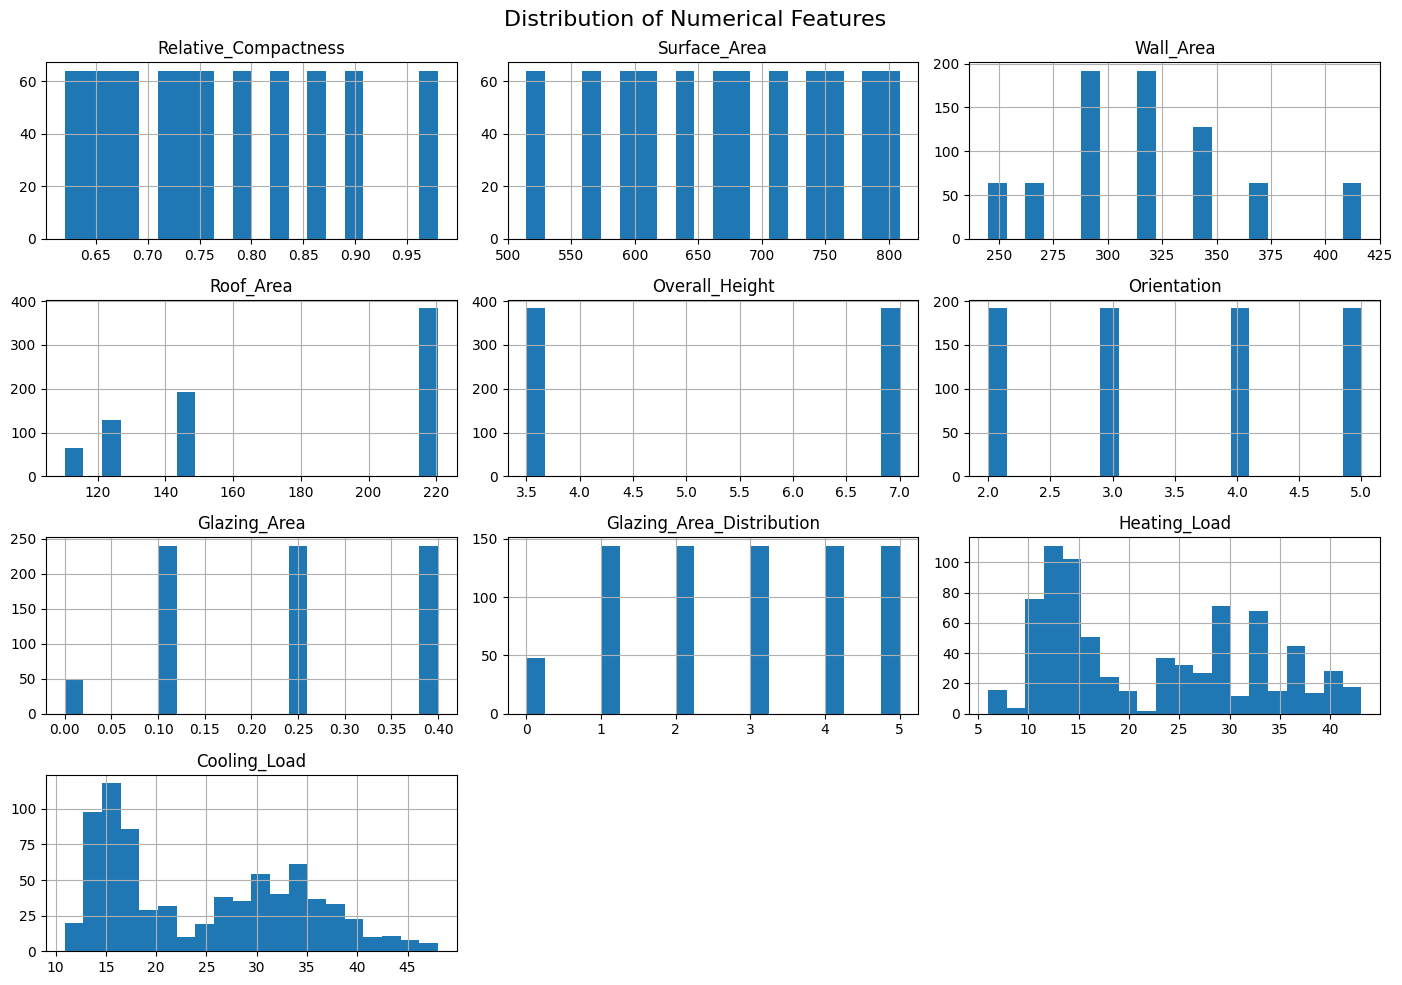

In [15]:
df.hist(figsize=(14,10), bins=20)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

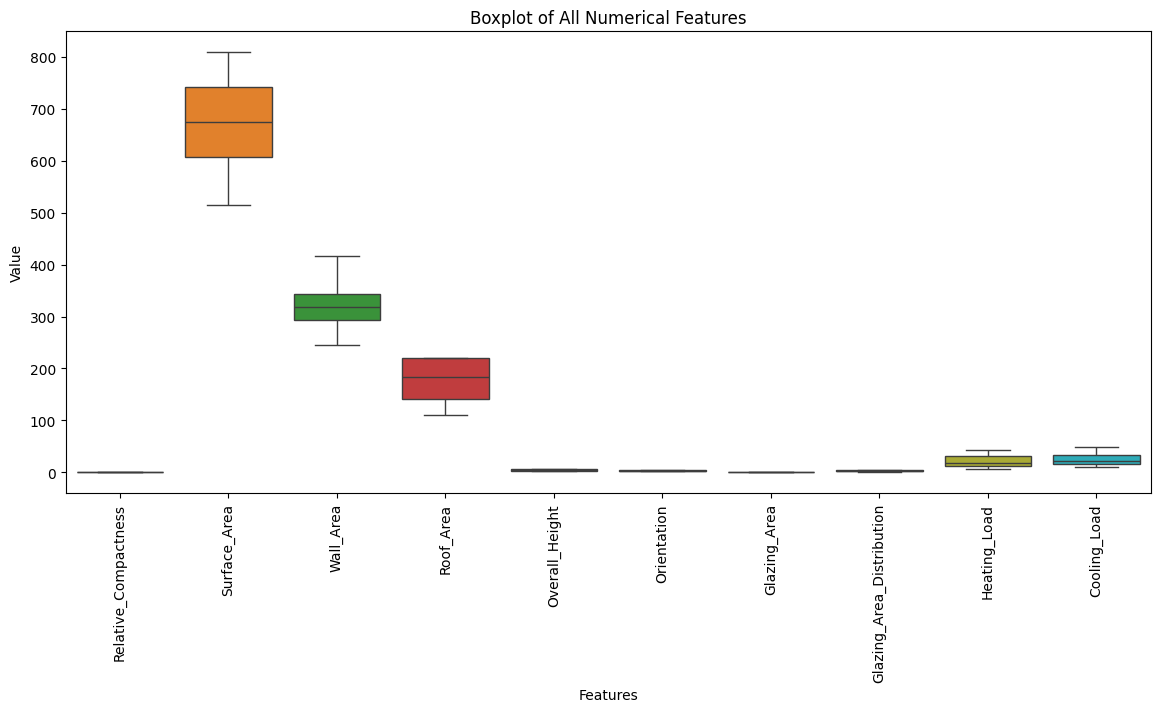

In [16]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df)
plt.title("Boxplot of All Numerical Features")
plt.xlabel("Features")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.show()

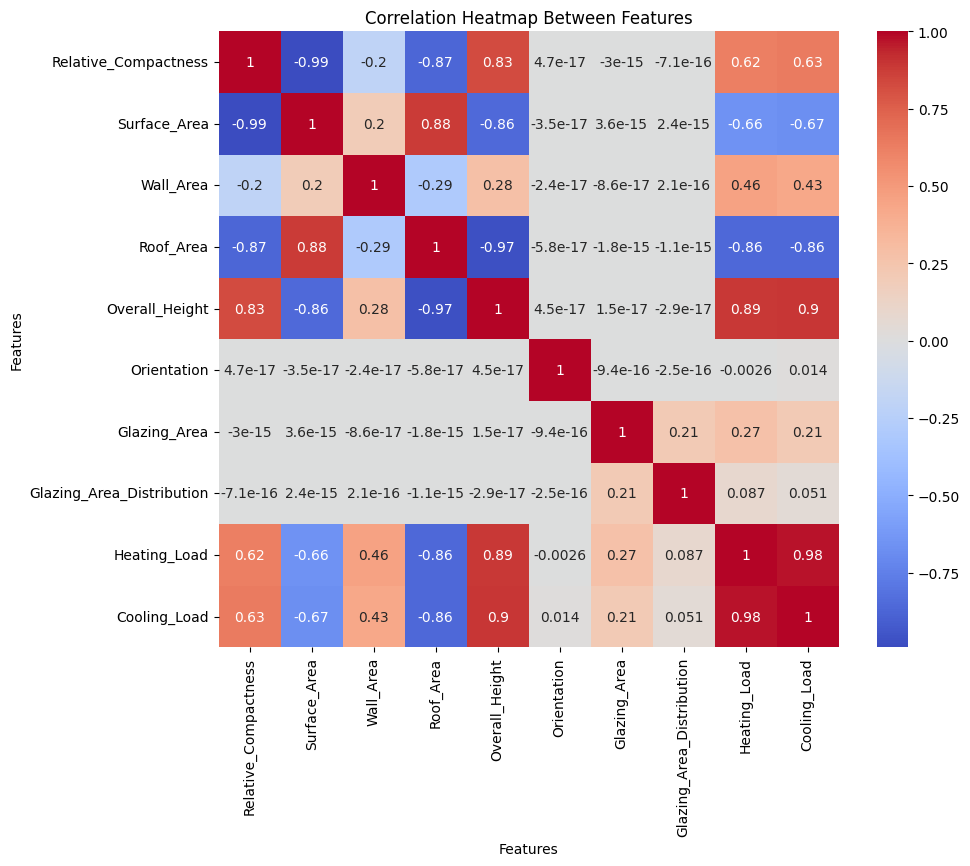

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Between Features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

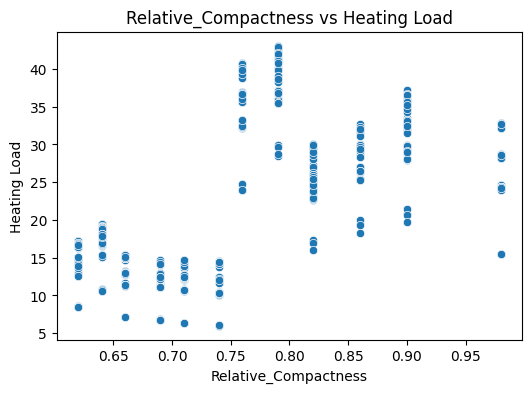

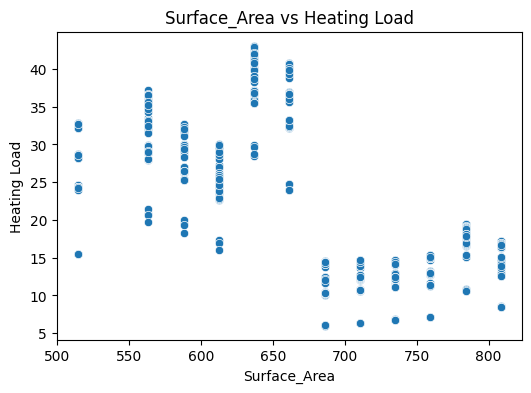

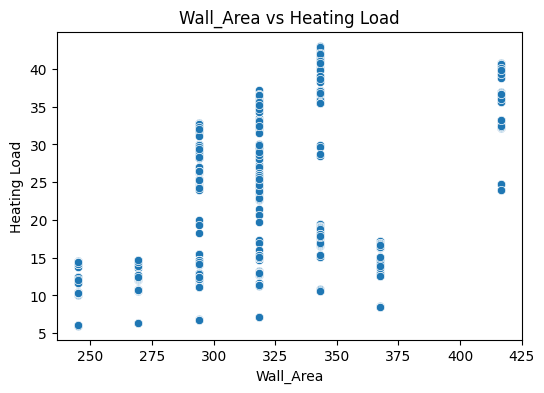

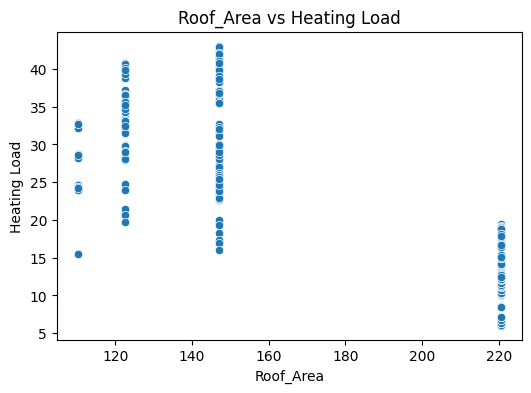

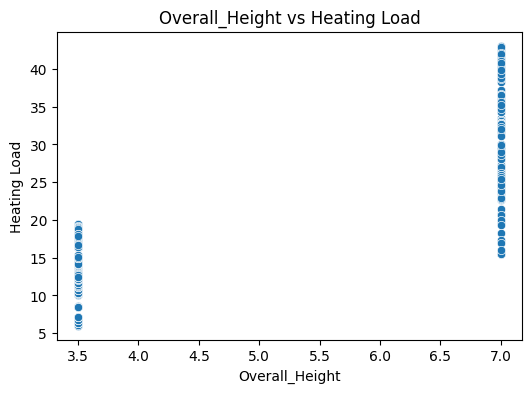

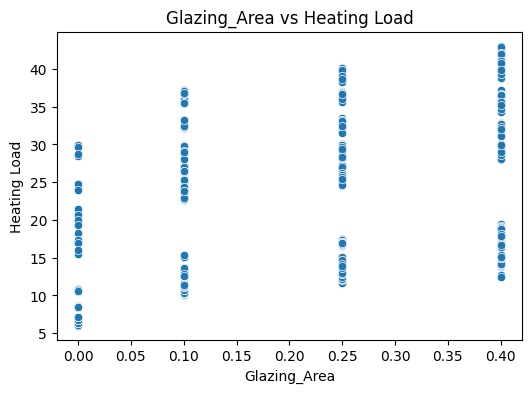

In [18]:
features = [
    "Relative_Compactness",
    "Surface_Area",
    "Wall_Area",
    "Roof_Area",
    "Overall_Height",
    "Glazing_Area"
]

for col in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df["Heating_Load"])
    plt.title(f"{col} vs Heating Load")
    plt.xlabel(col)
    plt.ylabel("Heating Load")
    plt.show()

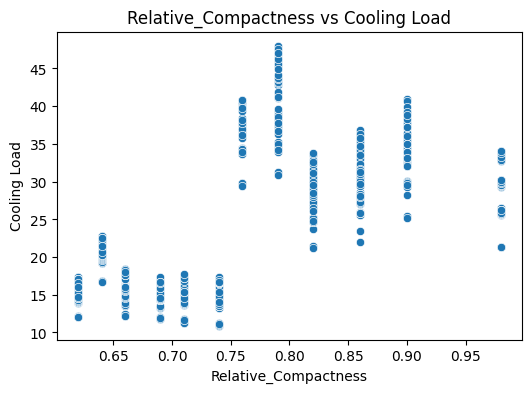

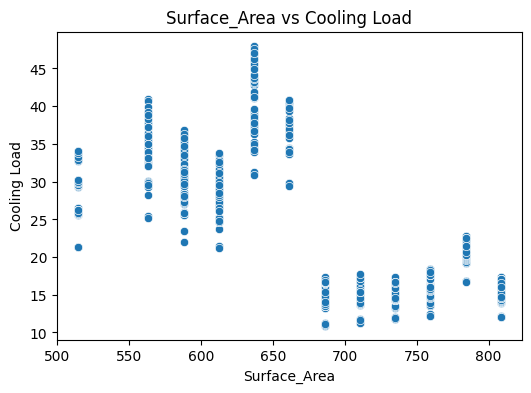

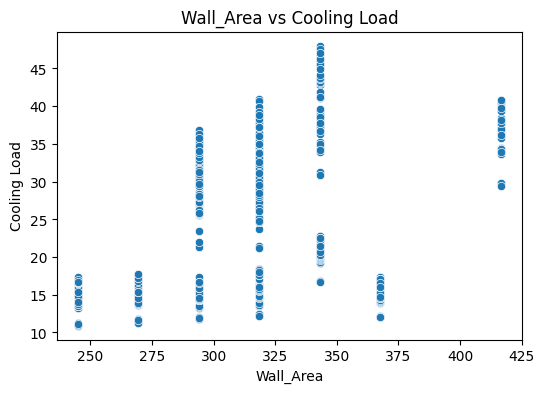

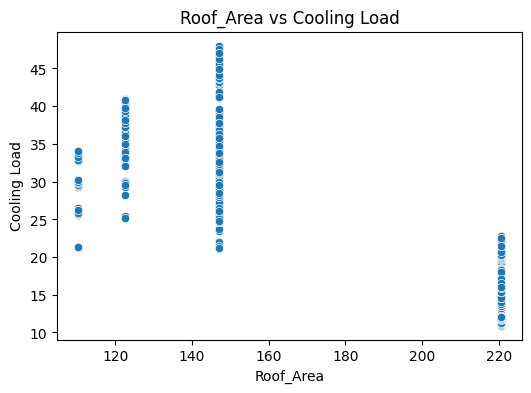

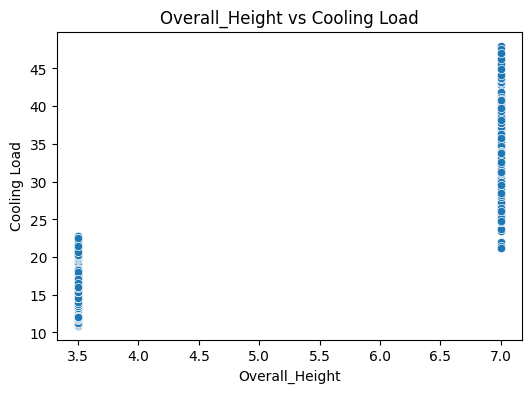

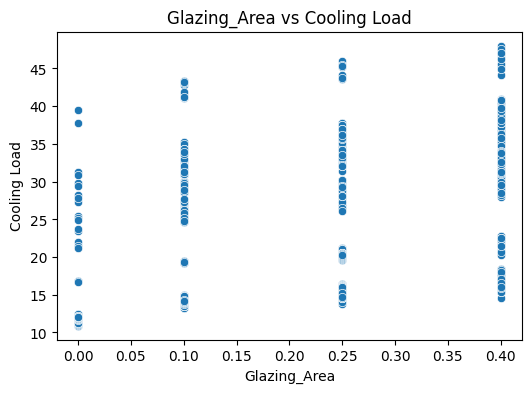

In [19]:
for col in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df["Cooling_Load"])
    plt.title(f"{col} vs Cooling Load")
    plt.xlabel(col)
    plt.ylabel("Cooling Load")
    plt.show()

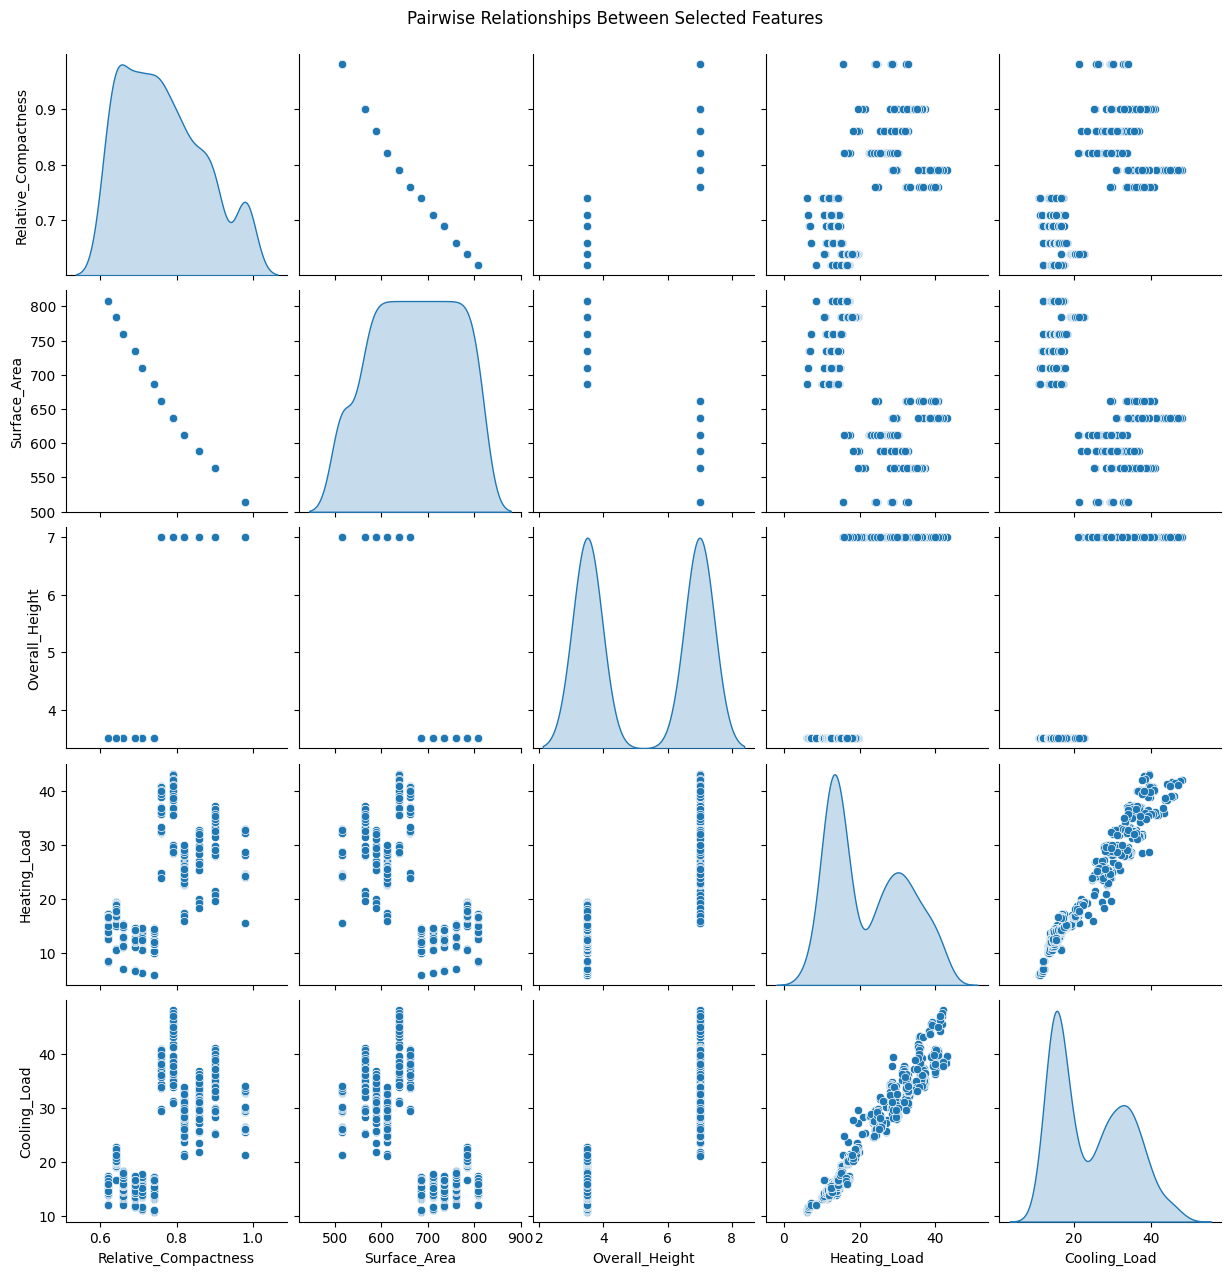

In [20]:
sns.pairplot(
    df[["Relative_Compactness","Surface_Area","Overall_Height","Heating_Load","Cooling_Load"]],
    diag_kind="kde"
)
plt.suptitle("Pairwise Relationships Between Selected Features", y=1.02)
plt.show()

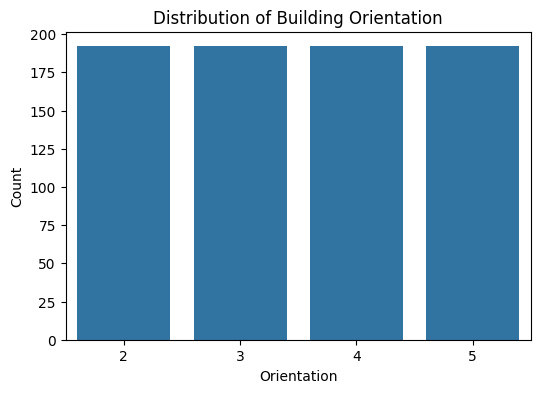

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Orientation"])
plt.title("Distribution of Building Orientation")
plt.xlabel("Orientation")
plt.ylabel("Count")
plt.show()

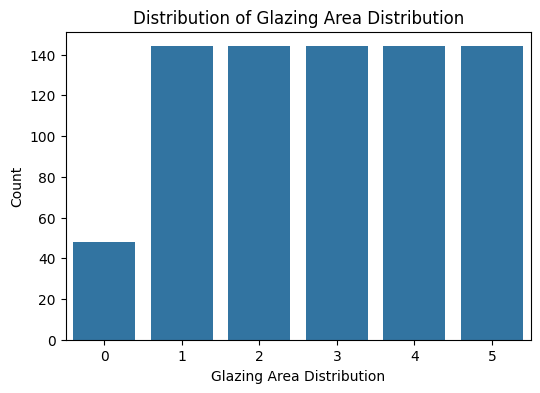

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Glazing_Area_Distribution"])
plt.title("Distribution of Glazing Area Distribution")
plt.xlabel("Glazing Area Distribution")
plt.ylabel("Count")
plt.show()